# Iris Classificatiom

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, f1_score

In [108]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


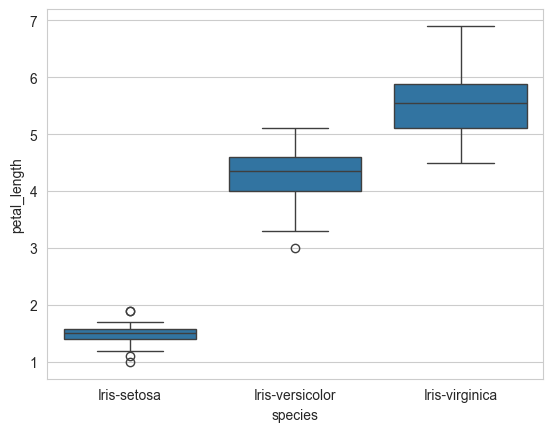

In [54]:
sns.boxplot(x="species",y="petal_length",data=df)
plt.show()

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\seaborn\axisgrid.py:2100: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


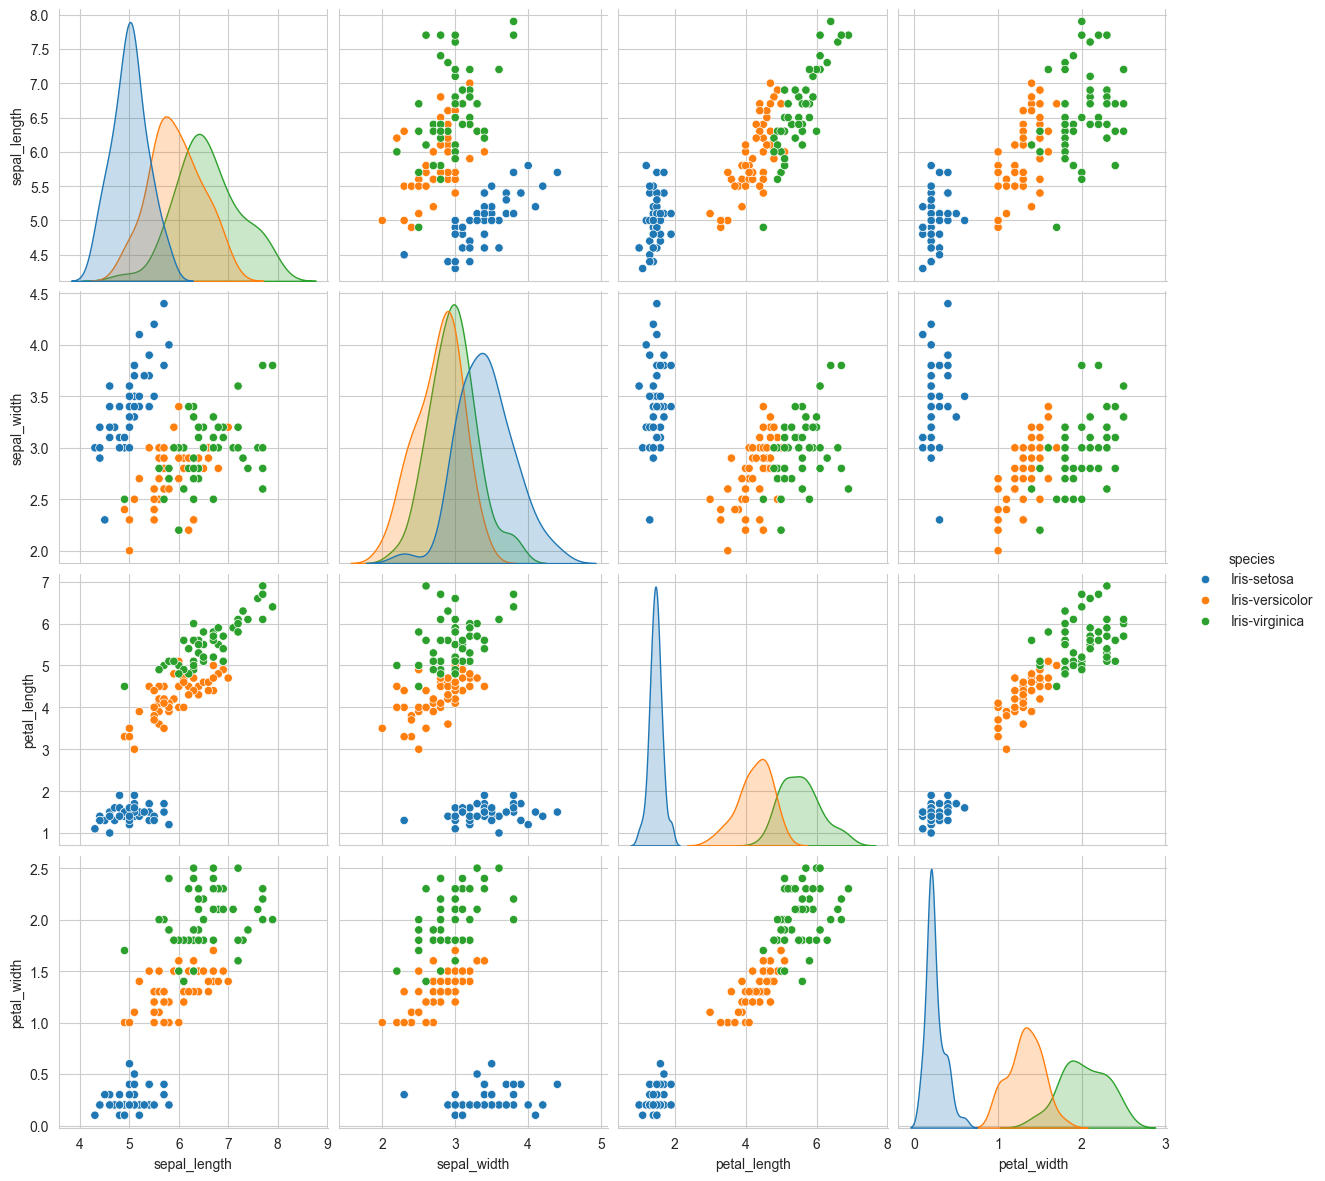

In [55]:
sns.set_style("whitegrid")
sns.pairplot(df,hue="species",size=3);
plt.show()

# KNN Classification

In [84]:
X = df.drop('species', axis=1) 
y = df['species']

In [85]:
# le = LabelEncoder()
# y = le.fit_transform(y)

In [86]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [93]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y   
)

In [94]:
# Check the class distributions
print("Original class distribution:\n", pd.Series(y).value_counts())
print("Training class distribution:\n", pd.Series(y_train).value_counts())
print("Test class distribution:\n", pd.Series(y_test).value_counts())

Original class distribution:
 species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64
Training class distribution:
 species
Iris-versicolor    35
Iris-setosa        35
Iris-virginica     35
Name: count, dtype: int64
Test class distribution:
 species
Iris-virginica     15
Iris-versicolor    15
Iris-setosa        15
Name: count, dtype: int64


In [95]:
# Print the class-to-integer mapping
mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Class to integer mapping:", mapping)

Class to integer mapping: {'Iris-setosa': 0, 'Iris-versicolor': 1, 'Iris-virginica': 2}


In [96]:
# Initialize the KNN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

In [97]:
# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.9777777777777777
Classification Report:
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       0.94      1.00      0.97        15
 Iris-virginica       1.00      0.93      0.97        15

       accuracy                           0.98        45
      macro avg       0.98      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45

Confusion Matrix:
 [[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


k=1, Accuracy = 0.933333
Confusion Matrix for k=1:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



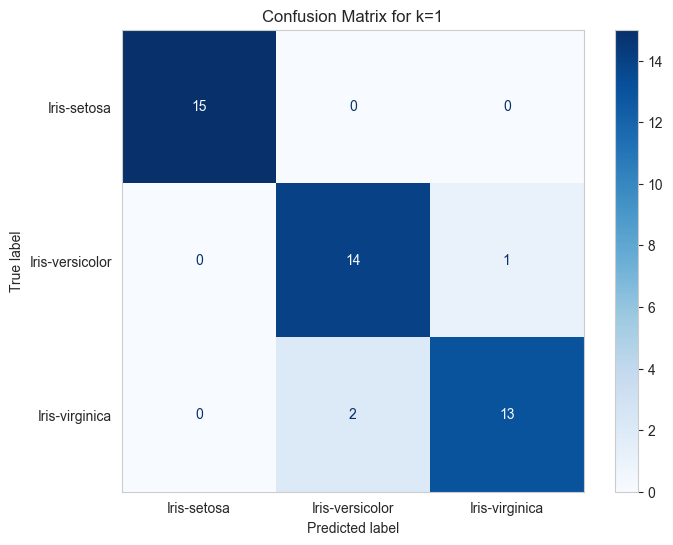

k=3, Accuracy = 0.955556
Confusion Matrix for k=3:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



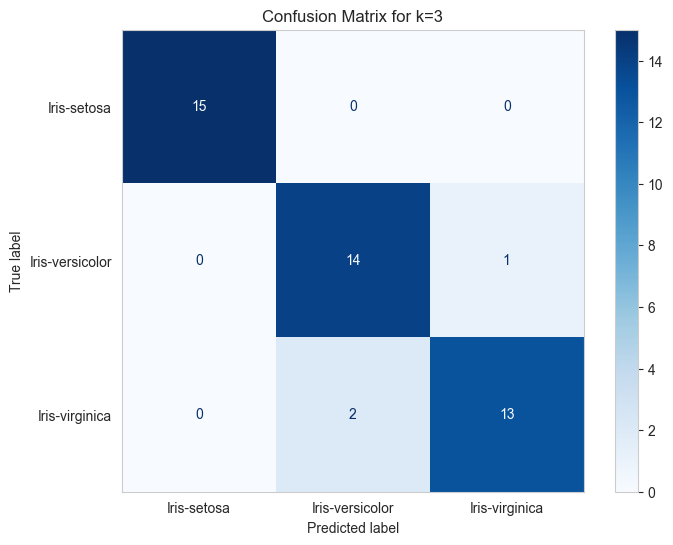

k=5, Accuracy = 0.977778
Confusion Matrix for k=5:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



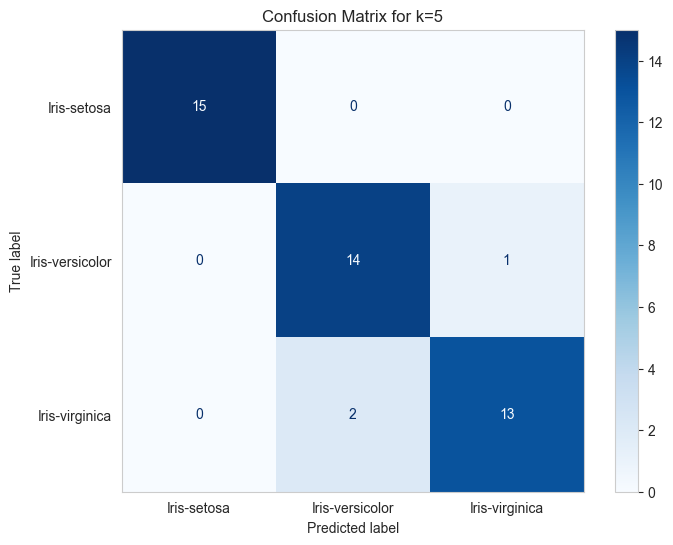

k=7, Accuracy = 0.955556
Confusion Matrix for k=7:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



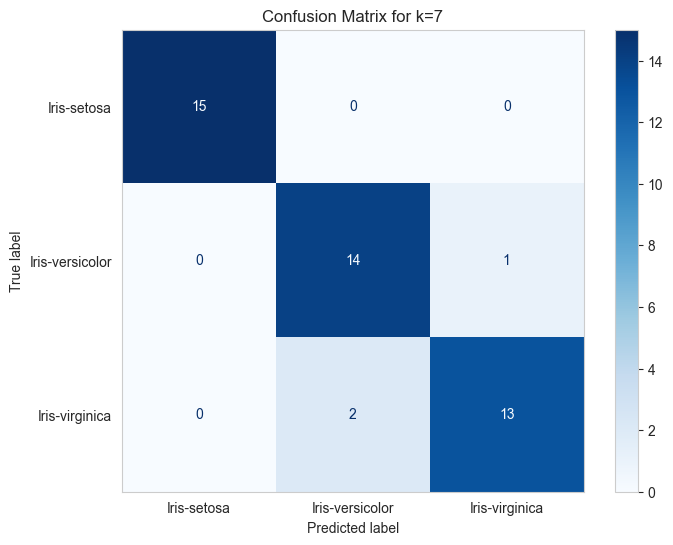

k=9, Accuracy = 0.955556
Confusion Matrix for k=9:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



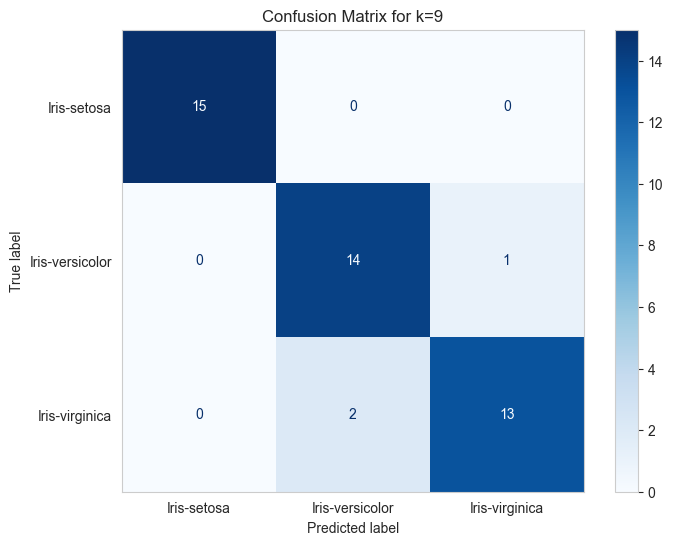

k=11, Accuracy = 0.933333
Confusion Matrix for k=11:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



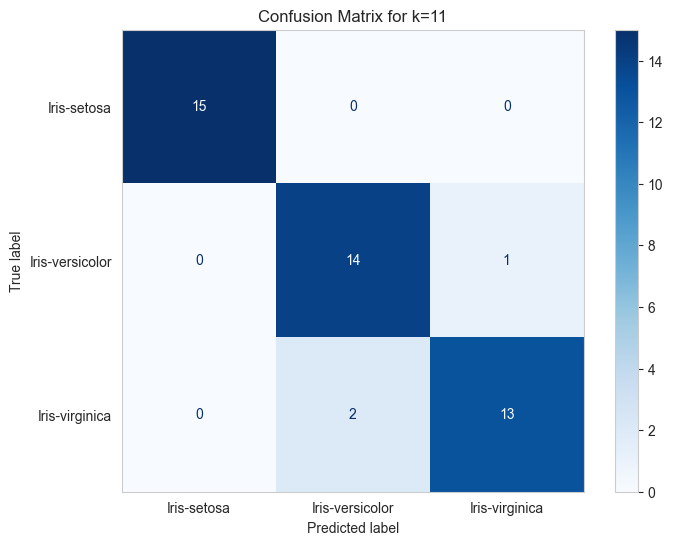

In [101]:
# List to store results
results = []

# Loop through values of k from 1 to 11, skipping every 2
for k in range(1, 12, 2):
    # Initialize the KNN classifier with the current value of k
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model
    knn.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = knn.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)

    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Store the result
    results.append((k, accuracy))

# Print the results
for k, accuracy in results:
    print(f"k={k}, Accuracy = {accuracy:.6f}")
    print(f"Confusion Matrix for k={k}:\n{cm}\n")
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    plt.title(f'Confusion Matrix for k={k}')
    ax.grid(False)
    plt.show()

# Logistic Regression

In [102]:
df = pd.read_csv("IRIS.csv")
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [114]:
X = df.drop('species', axis=1) 
y = df['species']

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.3,
    random_state=42,
    stratify=y   
)

In [116]:
# List to store results
results = []

# Define the regularization types and their respective parameters
regularization_types = {
    'L1': {'penalty': 'l1', 'solver': 'saga'},  # Use 'saga' solver for L1 regularization
    'L2': {'penalty': 'l2', 'solver': 'lbfgs'}  # 'lbfgs' is commonly used for L2 regularization
}

# Loop through each regularization type
for reg_type, params in regularization_types.items():
    # Initialize the Logistic Regression classifier with the current regularization
    log_reg = LogisticRegression(penalty=params['penalty'], solver=params['solver'], max_iter=1000)
    
    # Train the model
    log_reg.fit(X_train, y_train)
    
    # Make predictions on the test set
    y_pred = log_reg.predict(X_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')  # Compute weighted F1-score
    
    # Compute confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=y.unique())
    
    # Store the result
    results.append((reg_type, accuracy, f1, cm))


C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Regularization=L1, Accuracy = 0.977778, F1-score = 0.977753
Confusion Matrix for Regularization=L1:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



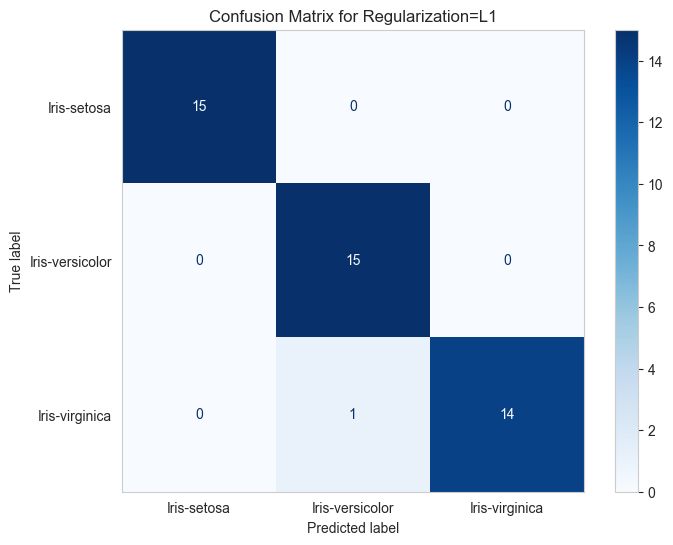

Regularization=L2, Accuracy = 0.933333, F1-score = 0.933259
Confusion Matrix for Regularization=L2:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



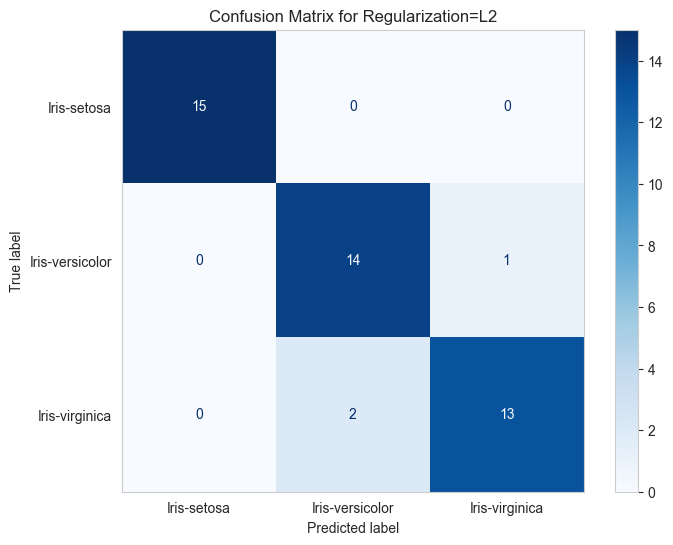

In [117]:
# Print the results and confusion matrices
for reg_type, accuracy, f1, cm in results:
    print(f"Regularization={reg_type}, Accuracy = {accuracy:.6f}, F1-score = {f1:.6f}")
    print(f"Confusion Matrix for Regularization={reg_type}:\n{cm}\n")
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    plt.title(f'Confusion Matrix for Regularization={reg_type}')
    
    # Remove gridlines
    ax.grid(False)
    
    plt.show()

C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\71524\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Regularization=L1, C=0.01, Accuracy = 0.333333, F1-score = 0.166667
Confusion Matrix for Regularization=L1, C=0.01:
[[15  0  0]
 [15  0  0]
 [15  0  0]]



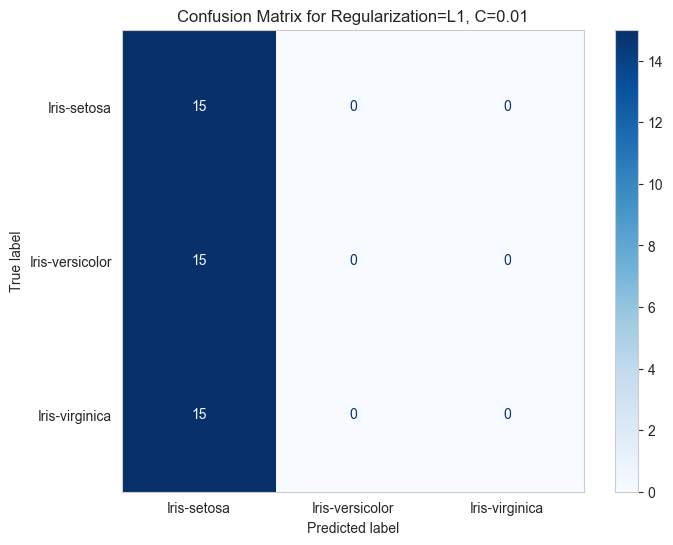

Regularization=L1, C=0.1, Accuracy = 0.933333, F1-score = 0.933259
Confusion Matrix for Regularization=L1, C=0.1:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



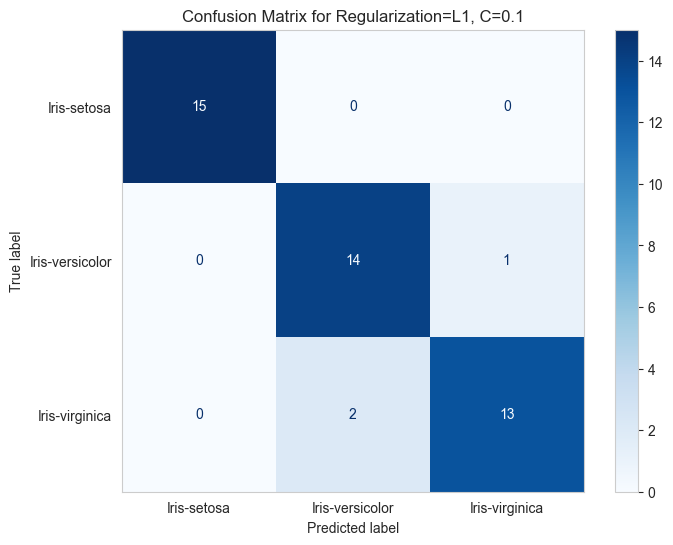

Regularization=L1, C=1, Accuracy = 0.977778, F1-score = 0.977753
Confusion Matrix for Regularization=L1, C=1:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



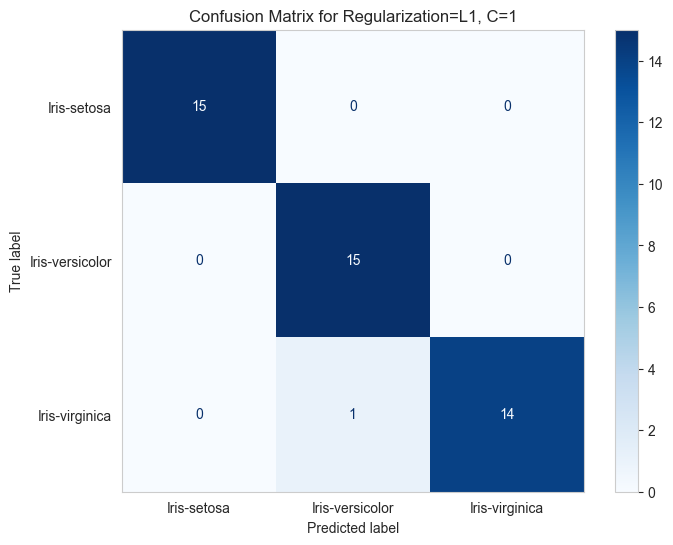

Regularization=L1, C=10, Accuracy = 0.977778, F1-score = 0.977753
Confusion Matrix for Regularization=L1, C=10:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



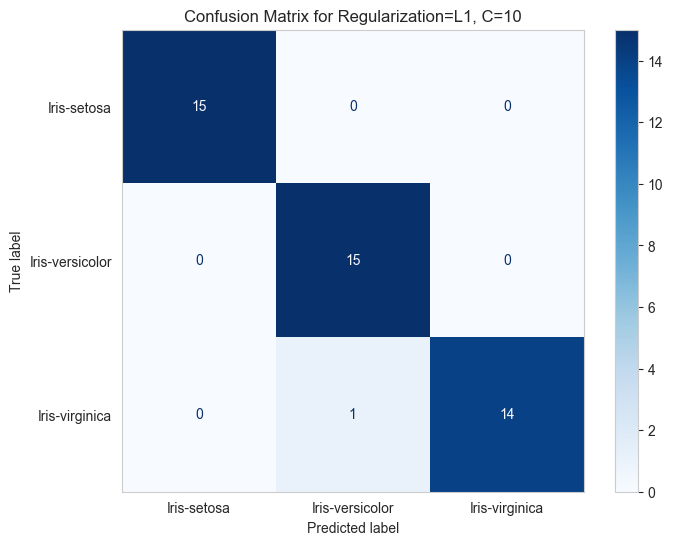

Regularization=L1, C=100, Accuracy = 0.977778, F1-score = 0.977753
Confusion Matrix for Regularization=L1, C=100:
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]



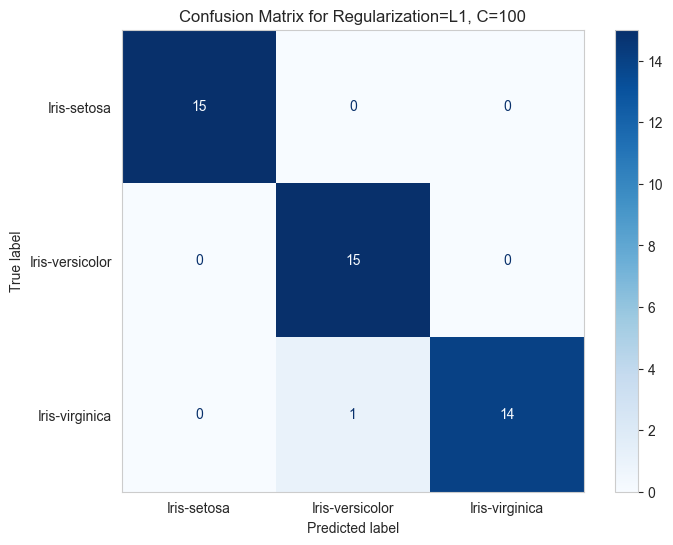

Regularization=L2, C=0.01, Accuracy = 0.822222, F1-score = 0.814815
Confusion Matrix for Regularization=L2, C=0.01:
[[15  0  0]
 [ 0  8  7]
 [ 0  1 14]]



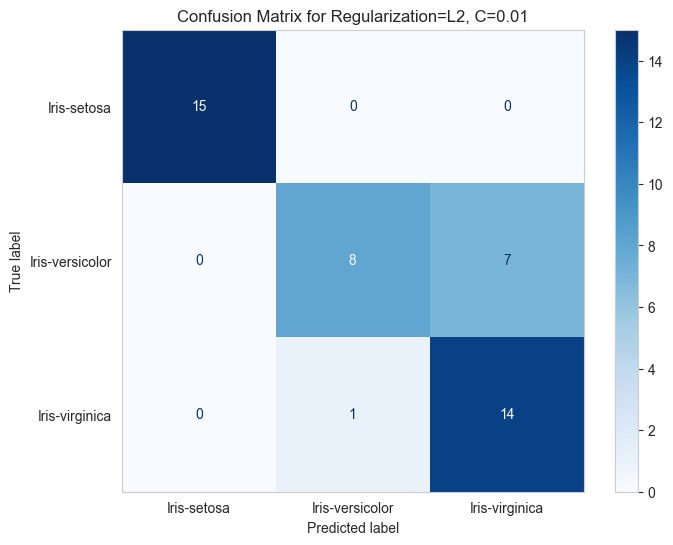

Regularization=L2, C=0.1, Accuracy = 0.933333, F1-score = 0.933259
Confusion Matrix for Regularization=L2, C=0.1:
[[15  0  0]
 [ 0 13  2]
 [ 0  1 14]]



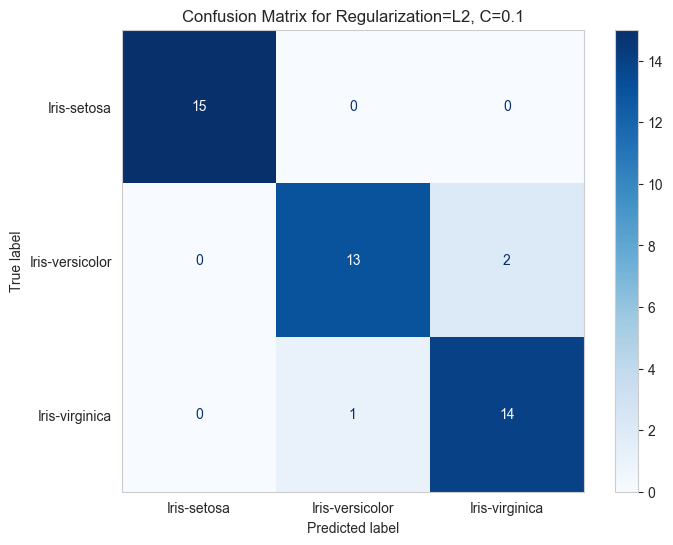

Regularization=L2, C=1, Accuracy = 0.933333, F1-score = 0.933259
Confusion Matrix for Regularization=L2, C=1:
[[15  0  0]
 [ 0 14  1]
 [ 0  2 13]]



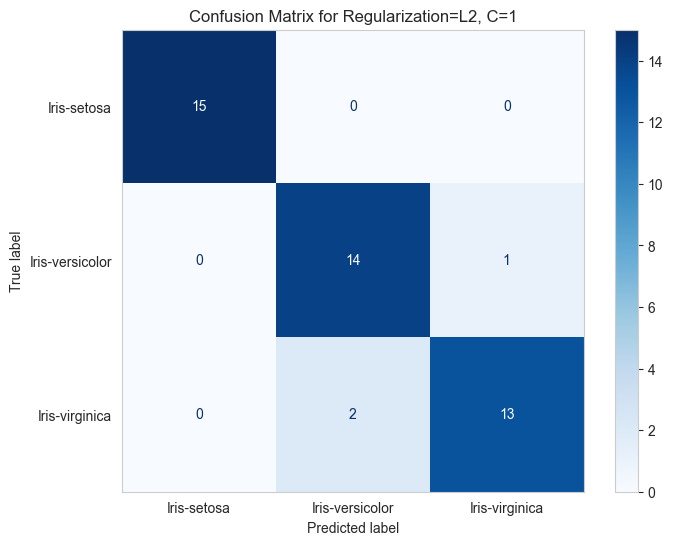

Regularization=L2, C=10, Accuracy = 0.955556, F1-score = 0.955357
Confusion Matrix for Regularization=L2, C=10:
[[15  0  0]
 [ 0 15  0]
 [ 0  2 13]]



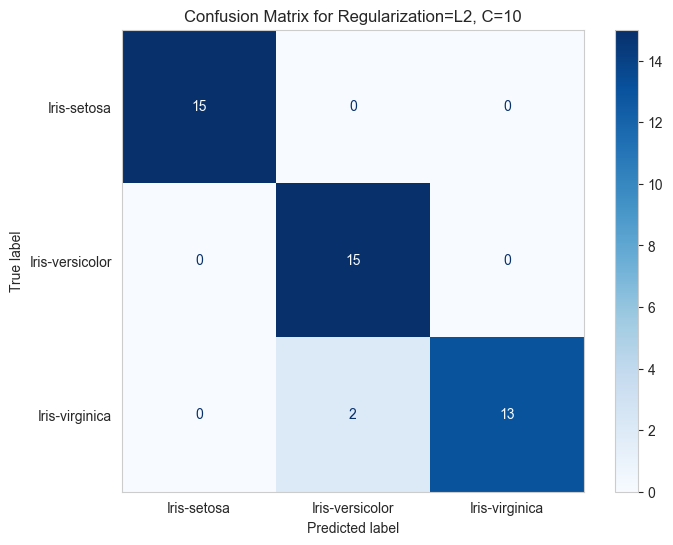

Regularization=L2, C=100, Accuracy = 0.933333, F1-score = 0.932660
Confusion Matrix for Regularization=L2, C=100:
[[15  0  0]
 [ 0 15  0]
 [ 0  3 12]]



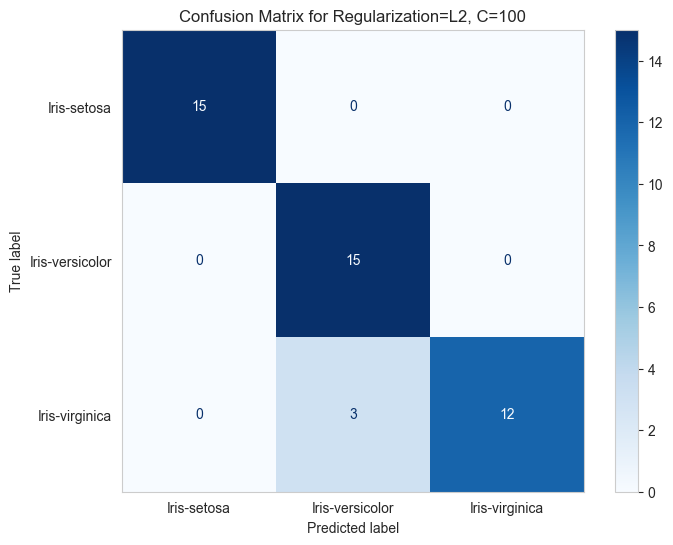

In [118]:
# Logistic Regression including the C values
# List to store results
results = []

# Define regularization types and parameters
regularization_types = {
    'L1': {'penalty': 'l1', 'solver': 'saga'},  # Use 'saga' solver for L1 regularization
    'L2': {'penalty': 'l2', 'solver': 'lbfgs'}  # 'lbfgs' is commonly used for L2 regularization
}

# Define C values to test
C_values = [0.01, 0.1, 1, 10, 100]

# Loop through each regularization type
for reg_type, params in regularization_types.items():
    for C in C_values:
        # Initialize the Logistic Regression classifier with the current regularization and C value
        log_reg = LogisticRegression(penalty=params['penalty'], solver=params['solver'], C=C, max_iter=1000)
        
        # Train the model
        log_reg.fit(X_train, y_train)
        
        # Make predictions on the test set
        y_pred = log_reg.predict(X_test)
        
        # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred, average='weighted')  # Compute weighted F1-score
        
        # Compute confusion matrix
        cm = confusion_matrix(y_test, y_pred, labels=y.unique())
        
        # Store the result
        results.append((reg_type, C, accuracy, f1, cm))
# Print the results and confusion matrices
for reg_type, C, accuracy, f1, cm in results:
    print(f"Regularization={reg_type}, C={C}, Accuracy = {accuracy:.6f}, F1-score = {f1:.6f}")
    print(f"Confusion Matrix for Regularization={reg_type}, C={C}:\n{cm}\n")
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=y.unique())
    fig, ax = plt.subplots(figsize=(8, 6))
    disp.plot(cmap=plt.cm.Blues, values_format='d', ax=ax)
    plt.title(f'Confusion Matrix for Regularization={reg_type}, C={C}')
    
    # Remove gridlines
    ax.grid(False)
    
    plt.show()